# Image classification with Convolutional Neural Networks (CNNs)

In [ ]:
# Library om YouTube videos te importeren

from IPython.display import YouTubeVideo, Image

One of the most groundbreaking uses of deep neural networks over the past decade has been in image processing and computer vision. A form of neural network, known as the "convolutional neural network" (CNN) has been particularly significant in the field of computer vision.

CNNs are built to handle 2-dimensional data. CNNs are particularly good at handling image data because they are designed to leverage the inherent spatial structure and correlation in images.

## 1 How do CNNs work?

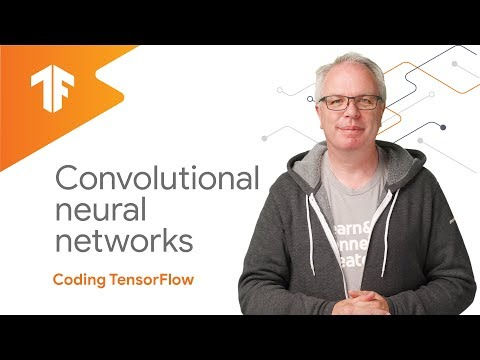

In [ ]:
YouTubeVideo("x_VrgWTKkiM", width=800, height=500)

In a CNN, the input image is fed into a series of filters, which are essentially small grids of numbers that are used to scan across the image. As each filter moves across the image, it performs a mathematical operation known as a convolution, which involves multiplying the values in the filter by the corresponding pixel values in the image, summing the results, and producing a single output value.

First, CNNs use convolutional filters to scan across the input image and extract features, such as edges and textures. These filters are able to capture local patterns and features regardless of their location within the image. This makes CNNs **translation invariant**, meaning that they can recognize the same pattern regardless of its position in the image.

Second, CNNs use pooling layers to downsample the features extracted from the image, which helps to **reduce the dimensionality** of the data and make the model more computationally efficient. This also helps the model to be robust to small variations in the input, such as slight rotations or translations.

Finally, CNNs are able to automatically learn features and representations of the input data during the training process, which makes them highly adaptable to different types of images and tasks. This means that CNNs can be trained on a relatively small amount of data and still achieve high accuracy, which is particularly useful in scenarios where large amounts of labeled data are not available.

![Convolution](cnn_demo.gif)

## 2 A basic image classifier using a CNN

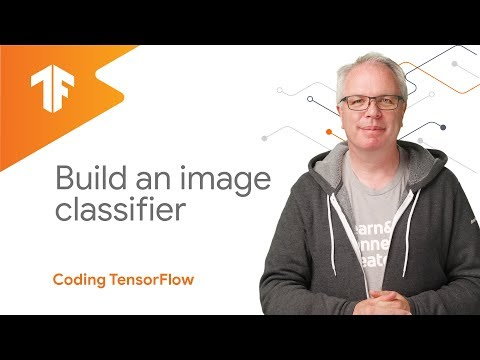

In [ ]:
YouTubeVideo("u2TjZzNuly8", width=800, height=500)

In this part of the notebook we are going to build an image classifier using TensorFlow and Keras, for the same dataset of handwritten digits that we classified using a fully-connected network. Remember, with the full connected network we were able to reach an accuracy of about 95%. Let's see what we can achieve by using **convolutional layers** in our network. Convolutional layers take advantage of spatial relations and correlations between nearby pixels in the image to gain a better understanding of the image data. They also use fewer parameters, since the weights in the convolutional layers are shared between pixels, unlike in a fully-connected network where each pixel has its own set of weights.

### 2.1 Setup

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2023-03-10 13:06:35.889404: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-10 13:06:36.025873: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/vikram/.mujoco/mujoco200/bin
2023-03-10 13:06:36.025889: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-10 13:06:36.619944: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot op

### 2.2 Prepare the data

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Original shape of training data: {x_train.shape}")
print(f"Original shape of training labels: {y_train.shape}")

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

Original shape of training data: (60000, 28, 28)
Original shape of training labels: (60000,)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### 2.3 Build the model

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),                           # An input layer with the shape of the image data
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), # A convolutional layer with 32 filters and ReLU activation
        layers.MaxPooling2D(pool_size=(2, 2)),                    # A maxpooling layer
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"), # A convolutional layer with 64 filters and ReLU activation
        layers.MaxPooling2D(pool_size=(2, 2)),                    # A maxpooling layer
        layers.Flatten(),                                         # Flattening to convert from 2D to 1D
        layers.Dense(128, activation='relu'),                     # A dense hidden layer
        layers.Dense(num_classes),                                # The output layer with 10 classes and linear activation
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

2023-03-10 13:25:15.021774: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-03-10 13:25:15.021819: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (vikram-Precision-7720): /proc/driver/nvidia/version does not exist
2023-03-10 13:25:15.022831: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 2.4 Train the model

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 17s 38ms/step - loss: 0.2268 - accuracy: 0.9344 - val_loss: 0.0631 - val_accuracy: 0.9813
Epoch 2/15
422/422 [==============================] - 16s 37ms/step - loss: 0.0587 - accuracy: 0.9816 - val_loss: 0.0464 - val_accuracy: 0.9870
Epoch 3/15
422/422 [==============================] - 16s 37ms/step - loss: 0.0411 - accuracy: 0.9872 - val_loss: 0.0359 - val_accuracy: 0.9885
Epoch 4/15
422/422 [==============================] - 16s 38ms/step - loss: 0.0312 - accuracy: 0.9901 - val_loss: 0.0390 - val_accuracy: 0.9895
Epoch 5/15
422/422 [==============================] - 15s 36ms/step - loss: 0.0254 - accuracy: 0.9923 - val_loss: 0.0364 - val_accuracy: 0.9900
Epoch 6/15
422/422 [==============================] - 15s 36ms/step - loss: 0.0188 - accuracy: 0.9941 - val_loss: 0.0366 - val_accuracy: 0.9900
Epoch 7/15
422/422 [==============================] - 15s 36ms/step - loss: 0.0152 - accuracy: 0.9952 - val_loss: 0.0386 - val_accuracy:

### 2.5 Evaluate the model and visualize the results

In [ ]:
import matplotlib.pyplot as plt

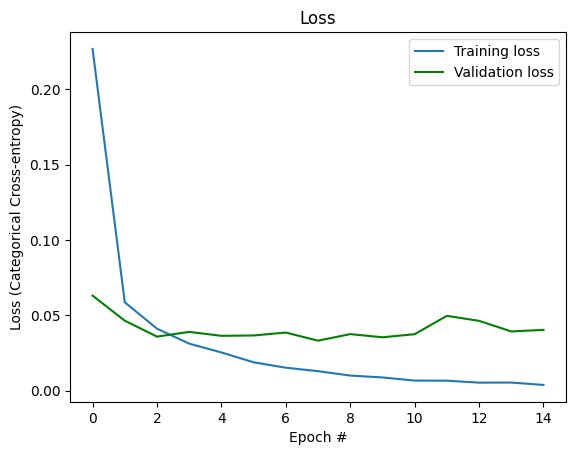

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], 'g', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss (Categorical Cross-entropy)')
plt.title('Loss')
plt.legend()

In [ ]:
# Evaluate model on test set

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.027681676670908928
Test accuracy: 0.9926999807357788


Remember that n the previous notebook, with a fully-connected network, you achieved around 95% accuracy on the test set. The addition of convolutional layers has bumped it up to between 98% and 99% accuracy!

## Exercises

#### Question 1

It is once again time to test your skills on the Fashion MNIST dataset. This time, use some convolutional layers at the start of your network. Remember the accuracy that you managed to achieve with the Fashion MNIST dataset in the previous notebook with a fully-connected network. Your goal is to beat that accuracy, using a convolutional neural network.

In [ ]:
# Getting the data

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#### a) Visualize the images in the dataset and explore the labels.

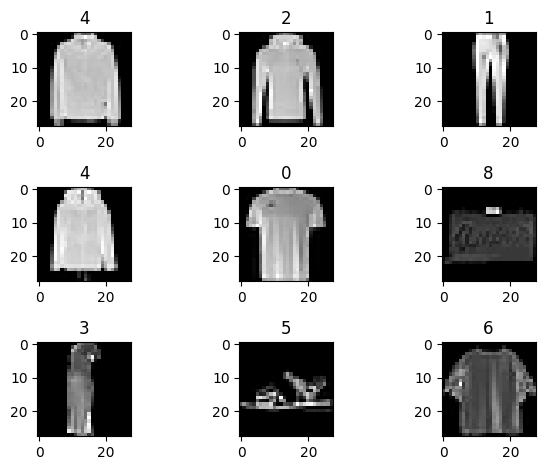

In [ ]:
# Plot a random sample from the dataset
indices = np.random.choice(len(train_images), size=9, replace=False)

for count, value in enumerate(indices):
    plt.subplot(3, 3, count+1)
    plt.imshow(train_images[value], cmap="gray")
    plt.title(train_labels[value])

plt.tight_layout()
plt.show()

#### b) Build a neural network to classify the images. Use convolutional layers at the start of the network. Use an appropriate loss and optimizer to compile it.

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(set(train_labels))

10

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Scale images to the [0, 1] range
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255


model = keras.Sequential(
    [
        keras.Input(shape=input_shape),                           # An input layer with the shape of the image data
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), # A convolutional layer with 32 filters and ReLU activation
        layers.MaxPooling2D(pool_size=(2, 2)),                    # A maxpooling layer
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"), # A convolutional layer with 64 filters and ReLU activation
        layers.MaxPooling2D(pool_size=(2, 2)),                    # A maxpooling layer
        layers.Flatten(),                                         # Flattening to convert from 2D to 1D
        layers.Dense(128, activation='relu'),                     # A dense hidden layer
        layers.Dense(num_classes),                                # The output layer with 10 classes and linear activation
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

#### c) Train your model.

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 16s 36ms/step - loss: 0.5626 - accuracy: 0.7990 - val_loss: 0.4115 - val_accuracy: 0.8565
Epoch 2/15
422/422 [==============================] - 14s 33ms/step - loss: 0.3616 - accuracy: 0.8710 - val_loss: 0.3308 - val_accuracy: 0.8817
Epoch 3/15
422/422 [==============================] - 14s 33ms/step - loss: 0.3169 - accuracy: 0.8850 - val_loss: 0.3109 - val_accuracy: 0.8847
Epoch 4/15
422/422 [==============================] - 14s 33ms/step - loss: 0.2851 - accuracy: 0.8970 - val_loss: 0.2850 - val_accuracy: 0.8980
Epoch 5/15
422/422 [==============================] - 14s 33ms/step - loss: 0.2601 - accuracy: 0.9041 - val_loss: 0.2740 - val_accuracy: 0.8977
Epoch 6/15
422/422 [==============================] - 14s 33ms/step - loss: 0.2425 - accuracy: 0.9126 - val_loss: 0.2811 - val_accuracy: 0.9017
Epoch 7/15
422/422 [==============================] - 14s 33ms/step - loss: 0.2254 - accuracy: 0.9168 - val_loss: 0.2482 - val_accuracy:

#### d) Evaluate your model on the test dataset. Visualize the loss curve. What is the final loss of your model? What is the test set accuracy? How does this accuracy compare to random guessing on this dataset? How does this accuracy compare to the accuracy with the fully-connected network in the precious notebook?

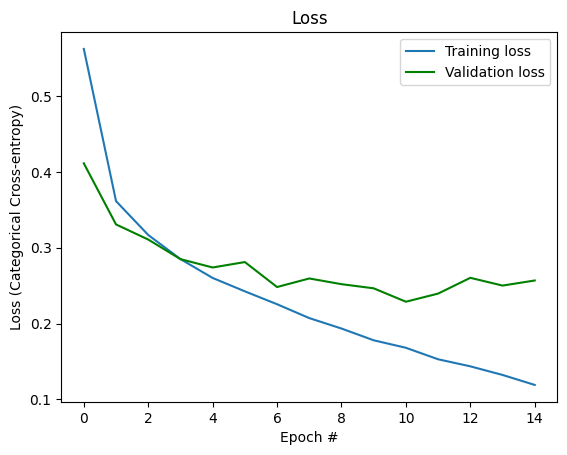

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], 'g', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss (Categorical Cross-entropy)')
plt.title('Loss')
plt.legend()

In [ ]:
# Evaluate model on test set

score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2758335471153259
Test accuracy: 0.910099983215332
